# DSS Boundary Extraction
#!pip install --upgrade ras-commander

#Import the ras-commander package
from ras_commander import *

In [1]:
# =============================================================================
# DEVELOPMENT MODE TOGGLE
# =============================================================================
USE_LOCAL_SOURCE = False  # <-- TOGGLE THIS

if USE_LOCAL_SOURCE:
    import sys
    from pathlib import Path
    local_path = str(Path.cwd().parent)
    if local_path not in sys.path:
        sys.path.insert(0, local_path)
    print(f"📁 LOCAL SOURCE MODE: Loading from {local_path}/ras_commander")
else:
    print("📦 PIP PACKAGE MODE: Loading installed ras-commander")

# Import ras-commander
from ras_commander import init_ras_project, RasExamples, RasDss

# Additional imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verify which version loaded
import ras_commander
print(f"✓ Loaded: {ras_commander.__file__}")

📦 PIP PACKAGE MODE: Loading installed ras-commander


✓ Loaded: c:\Users\billk_clb\anaconda3\envs\rascmdr_piptest\Lib\site-packages\ras_commander\__init__.py


## Parameters

Configure these values to customize the notebook for your project.

In [ ]:
# =============================================================================
# PARAMETERS - Edit these to customize the notebook
# =============================================================================
from pathlib import Path

# Project Configuration
PROJECT_NAME = "Muncie"           # Example project to extract
RAS_VERSION = "6.6"               # HEC-RAS version (6.3, 6.5, 6.6, etc.)

# Output Configuration
OUTPUTS_DIR = Path("_outputs") / "310_dss_boundary_extraction"  # Artifacts saved here

# Execution Settings
PLAN = "01"                       # Plan number to execute
NUM_CORES = 4                     # CPU cores for 2D computation
RUN_SUFFIX = "run"                # Suffix for run folder (e.g., Muncie_run)

# Create output directory
OUTPUTS_DIR.mkdir(parents=True, exist_ok=True)
print(f"Outputs will be saved to: {OUTPUTS_DIR.absolute()}")


# DSS Boundary Condition Extraction

This notebook demonstrates how to extract DSS (Data Storage System) boundary condition data from HEC-RAS projects using ras-commander.

**Example Project**: BaldEagleCrkMulti2D, Plan 07

## Features Demonstrated
- Reading DSS file catalogs
- Extracting individual time series
- Automatic boundary condition extraction
- Plotting DSS boundary data

In [2]:
!pip install pyjnius

## Step 1: Extract Example Project

Extract the Bald Eagle Creek Multi-2D example project which contains DSS boundary conditions.

In [3]:
# Extract BaldEagleCrkMulti2D example project
project_path = RasExamples.extract_project("BaldEagleCrkMulti2D", suffix="22")
print(f"Project extracted to: {project_path}")

2025-12-16 13:55:17 - ras_commander.RasExamples - INFO - Found zip file: C:\Users\billk_clb\anaconda3\envs\rascmdr_piptest\Lib\site-packages\examples\Example_Projects_6_6.zip


2025-12-16 13:55:17 - ras_commander.RasExamples - INFO - Loading project data from CSV...


2025-12-16 13:55:17 - ras_commander.RasExamples - INFO - Loaded 68 projects from CSV.


2025-12-16 13:55:17 - ras_commander.RasExamples - INFO - ----- RasExamples Extracting Project -----


2025-12-16 13:55:17 - ras_commander.RasExamples - INFO - Extracting project 'BaldEagleCrkMulti2D'


2025-12-16 13:55:18 - ras_commander.RasExamples - INFO - Successfully extracted project 'BaldEagleCrkMulti2D' to c:\GH\ras-commander\examples\example_projects_22_dss_boundary_extraction\BaldEagleCrkMulti2D


Project extracted to: c:\GH\ras-commander\examples\example_projects_22_dss_boundary_extraction\BaldEagleCrkMulti2D


## Step 2: Initialize Project

Initialize the HEC-RAS project to access boundary condition data.

In [4]:
# Initialize project
ras = init_ras_project(project_path, "6.6")

print(f"\nProject: {ras.project_name}")
print(f"Plans: {len(ras.plan_df)}")
print(f"Boundaries: {len(ras.boundaries_df)}")

2025-12-16 13:55:18 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects_22_dss_boundary_extraction\BaldEagleCrkMulti2D\BaldEagleDamBrk.rasmap



Project: BaldEagleDamBrk
Plans: 11
Boundaries: 51


## Step 3: Examine Boundary Conditions

View boundary conditions and identify which are defined by DSS files.

In [5]:
# Show boundaries for plan 07
plan_07_boundaries = ras.boundaries_df[ras.boundaries_df['unsteady_number'] == '07'].copy()

print(f"Plan 07 has {len(plan_07_boundaries)} boundary conditions\n")

# Show DSS-defined boundaries
dss_boundaries = plan_07_boundaries[plan_07_boundaries['Use DSS'] == True]
print(f"DSS-defined boundaries: {len(dss_boundaries)}\n")

# Display key columns
display_cols = ['boundary_condition_number', 'bc_type', 'Use DSS', 'DSS File', 'DSS Path']
print(dss_boundaries[display_cols].to_string())

Plan 07 has 10 boundary conditions

DSS-defined boundaries: 0

Empty DataFrame
Columns: [boundary_condition_number, bc_type, Use DSS, DSS File, DSS Path]
Index: []


## Step 4: Inspect DSS File

Examine what's in the DSS file before extracting data.

In [6]:
# Get DSS file path
dss_file = project_path / "Bald_Eagle_Creek.dss"

if dss_file.exists():
    # Get file info
    info = RasDss.get_info(dss_file)
    
    print(f"DSS File: {info['filename']}")
    print(f"Size: {info['file_size_mb']:.2f} MB")
    print(f"Total paths: {info['total_paths']}")
    
    print(f"\nFirst 10 paths:")
    catalog = RasDss.get_catalog(dss_file)
    for i, path in enumerate(catalog[:10]):
        print(f"  {i+1}. {path}")
else:
    print(f"DSS file not found: {dss_file}")

Configuring Java VM for DSS operations...
  Found Java: C:\Program Files\Java\jre1.8.0_471
[OK] Java VM configured


DSS File: Bald_Eagle_Creek.dss
Size: 29.27 MB
Total paths: 1270

First 10 paths:
  1. //BALD EAGLE AT MILESBURG/FLOW/01SEP2004/15MIN/GAGE/
  2. //FISHING CREEK/FLOW-BASE/01JUN1972/15MIN/RUN:1972 CALIBRATION EVENT/
  3. //LOCAL DOWNSTREAM OF DAM/FLOW/01JUN1972/15MIN/RUN:1972 CALIBRATION EVENT/
  4. //MARSH CREEK/INFILTRATION/01JAN1996/15MIN/RUN:1996 CALIBRATION EVENT/
  5. //SAYERS - ELEVATION-STORAGE/ELEVATION-STORAGE///TABLE/
  6. //MARSH CREEK GAGE/FLOW-OBSERVED/01JUN1972/15MIN/RUN:1972 CALIBRATION EVENT/
  7. //BALD EAGLE AT MILESBURG/FLOW-OBSERVED/01JUN1972/15MIN/RUN:1972 CALIBRATION EVENT/
  8. //MARSH CREEK/PRECIP-INC/01JAN2000/15MIN/DAA:1% EVENT>BALD EAGLE BL BEECH/
  9. //BASIN TEMPERATURE/TEMPERATURE/01JUN1972/1HOUR/GAGE/
  10. //BALD EAGLE HW/INFILTRATION/01JAN2000/15MIN/RUN:1% EVENT/


## Step 5: Extract Single Time Series

Demonstrate extracting a single DSS time series.

In [7]:
dss_boundaries

,unsteady_number,boundary_condition_number,river_reach_name,river_station,storage_area_name,pump_station_name,bc_type,hydrograph_type,Interval,DSS File,...,Flow Title,Program Version,Use Restart,Precipitation Mode,Wind Mode,Met BC=Precipitation|Mode,Met BC=Evapotranspiration|Mode,Met BC=Precipitation|Expanded View,Met BC=Precipitation|Constant Units,Met BC=Precipitation|Gridded Source


In [8]:
if len(dss_boundaries) > 0:
    # Get first DSS boundary
    first_dss = dss_boundaries.iloc[0]
    
    print(f"Boundary Type: {first_dss['bc_type']}")
    print(f"DSS Path: {first_dss['DSS Path']}")
    
    # Extract time series
    dss_file_path = project_path / first_dss['DSS File']
    df_ts = RasDss.read_timeseries(dss_file_path, first_dss['DSS Path'])
    
    print(f"\nExtracted {len(df_ts)} data points")
    print(f"Date range: {df_ts.index.min()} to {df_ts.index.max()}")
    print(f"Value range: {df_ts['value'].min():.2f} to {df_ts['value'].max():.2f}")
    print(f"Units: {df_ts.attrs.get('units', 'N/A')}")
    
    # Display first/last rows
    print(f"\nFirst 5 rows:")
    display(df_ts.head())
    
    print(f"\nLast 5 rows:")
    display(df_ts.tail())

## Step 6: Plot Time Series

Visualize the extracted DSS boundary condition data.

In [9]:
# Extract all DSS boundary time series for plan 07
enhanced_boundaries = RasDss.extract_boundary_timeseries(
    plan_07_boundaries, 
    ras_object=ras
)

# Show results
print(f"\nExtraction complete!")
print(f"Total boundaries: {len(enhanced_boundaries)}")

# Count DSS-defined boundaries (handle string 'True')
dss_count = ((enhanced_boundaries['Use DSS'] == True) | (enhanced_boundaries['Use DSS'] == 'True')).sum()
print(f"DSS-defined: {dss_count}")

# Show extracted data summary
print(f"\nDSS Boundary Summary:")
print("-" * 80)
for idx, row in enhanced_boundaries.iterrows():
    # Check if DSS boundary (handle string 'True')
    is_dss = (row['Use DSS'] == True) or (row['Use DSS'] == 'True')
    if is_dss and row['dss_timeseries'] is not None:
        df = row['dss_timeseries']
        print(f"\n{row['bc_type']}:")
        print(f"  Location: {row['river_reach_name']} RS {row['river_station']}")
        print(f"  DSS Path: {row['DSS Path']}")
        print(f"  Points: {len(df)}")
        print(f"  Date range: {df.index.min()} to {df.index.max()}")
        print(f"  Value range: {df['value'].min():.2f} to {df['value'].max():.2f} {df.attrs.get('units', '')}")

2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Found 7 DSS-defined boundaries


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Row 0: Extracted 673 points from Bald_Eagle_Creek.dss


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Row 2: Extracted 673 points from Bald_Eagle_Creek.dss


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Row 4: Extracted 673 points from Bald_Eagle_Creek.dss


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Row 5: Extracted 673 points from Bald_Eagle_Creek.dss


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Row 6: Extracted 673 points from Bald_Eagle_Creek.dss


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Row 7: Extracted 673 points from Bald_Eagle_Creek.dss


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Row 8: Extracted 673 points from Bald_Eagle_Creek.dss


2025-12-16 13:55:19 - ras_commander.dss.RasDss - INFO - Extraction complete: 7 success, 0 failed



Extraction complete!
Total boundaries: 10
DSS-defined: 7

DSS Boundary Summary:
--------------------------------------------------------------------------------

Flow Hydrograph:
  Location: Bald Eagle Cr. RS Lock Haven
  DSS Path: //BALD EAGLE 40/FLOW/01JAN1999/15MIN/RUN:PMF-EVENT/
  Points: 673
  Date range: 1999-01-01 00:00:00 to 1999-01-08 00:00:00
  Value range: 719.78 to 193738.20 CFS

Lateral Inflow Hydrograph:
  Location: Bald Eagle Cr. RS Lock Haven
  DSS Path: //FISHING CREEK/FLOW/01JAN1999/15MIN/RUN:PMF-EVENT/
  Points: 673
  Date range: 1999-01-01 00:00:00 to 1999-01-08 00:00:00
  Value range: 345.89 to 28510.08 CFS

Uniform Lateral Inflow Hydrograph:
  Location: Bald Eagle Cr. RS Lock Haven
  DSS Path: //RESERVOIR LOCAL/FLOW/01JAN1999/15MIN/RUN:PMF-EVENT/
  Points: 673
  Date range: 1999-01-01 00:00:00 to 1999-01-08 00:00:00
  Value range: 209.15 to 75262.30 CFS

Uniform Lateral Inflow Hydrograph:
  Location: Bald Eagle Cr. RS Lock Haven
  DSS Path: //LOCAL DOWNSTREAM OF 

## Step 7: Extract ALL Boundary DSS Data

Use the `extract_boundary_timeseries()` function to automatically extract ALL DSS boundary data in one call.

In [10]:
# Count boundary types
print("Boundary Definition Summary:")
print("=" * 80)

# Handle both string and boolean 'Use DSS' values
manual_bc = enhanced_boundaries[
    (enhanced_boundaries['Use DSS'] == False) | (enhanced_boundaries['Use DSS'] == 'False') | (enhanced_boundaries['Use DSS'].isna())
]
dss_bc = enhanced_boundaries[
    (enhanced_boundaries['Use DSS'] == True) | (enhanced_boundaries['Use DSS'] == 'True')
]

print(f"\nManual boundaries (defined in .u## file): {len(manual_bc)}")
if len(manual_bc) > 0:
    print("  Types:")
    for bc_type, count in manual_bc['bc_type'].value_counts().items():
        print(f"    - {bc_type}: {count}")

print(f"\nDSS boundaries (defined in DSS file): {len(dss_bc)}")
if len(dss_bc) > 0:
    print("  Types:")
    for bc_type, count in dss_bc['bc_type'].value_counts().items():
        print(f"    - {bc_type}: {count}")

print(f"\nTotal boundaries: {len(enhanced_boundaries)}")

Boundary Definition Summary:

Manual boundaries (defined in .u## file): 3
  Types:
    - Gate Opening: 1
    - Lateral Inflow Hydrograph: 1
    - Normal Depth: 1

DSS boundaries (defined in DSS file): 7
  Types:
    - Lateral Inflow Hydrograph: 3
    - Uniform Lateral Inflow Hydrograph: 3
    - Flow Hydrograph: 1

Total boundaries: 10


## Step 8: Compare Manual vs DSS Boundaries

Show the difference between manually-defined and DSS-defined boundary conditions.

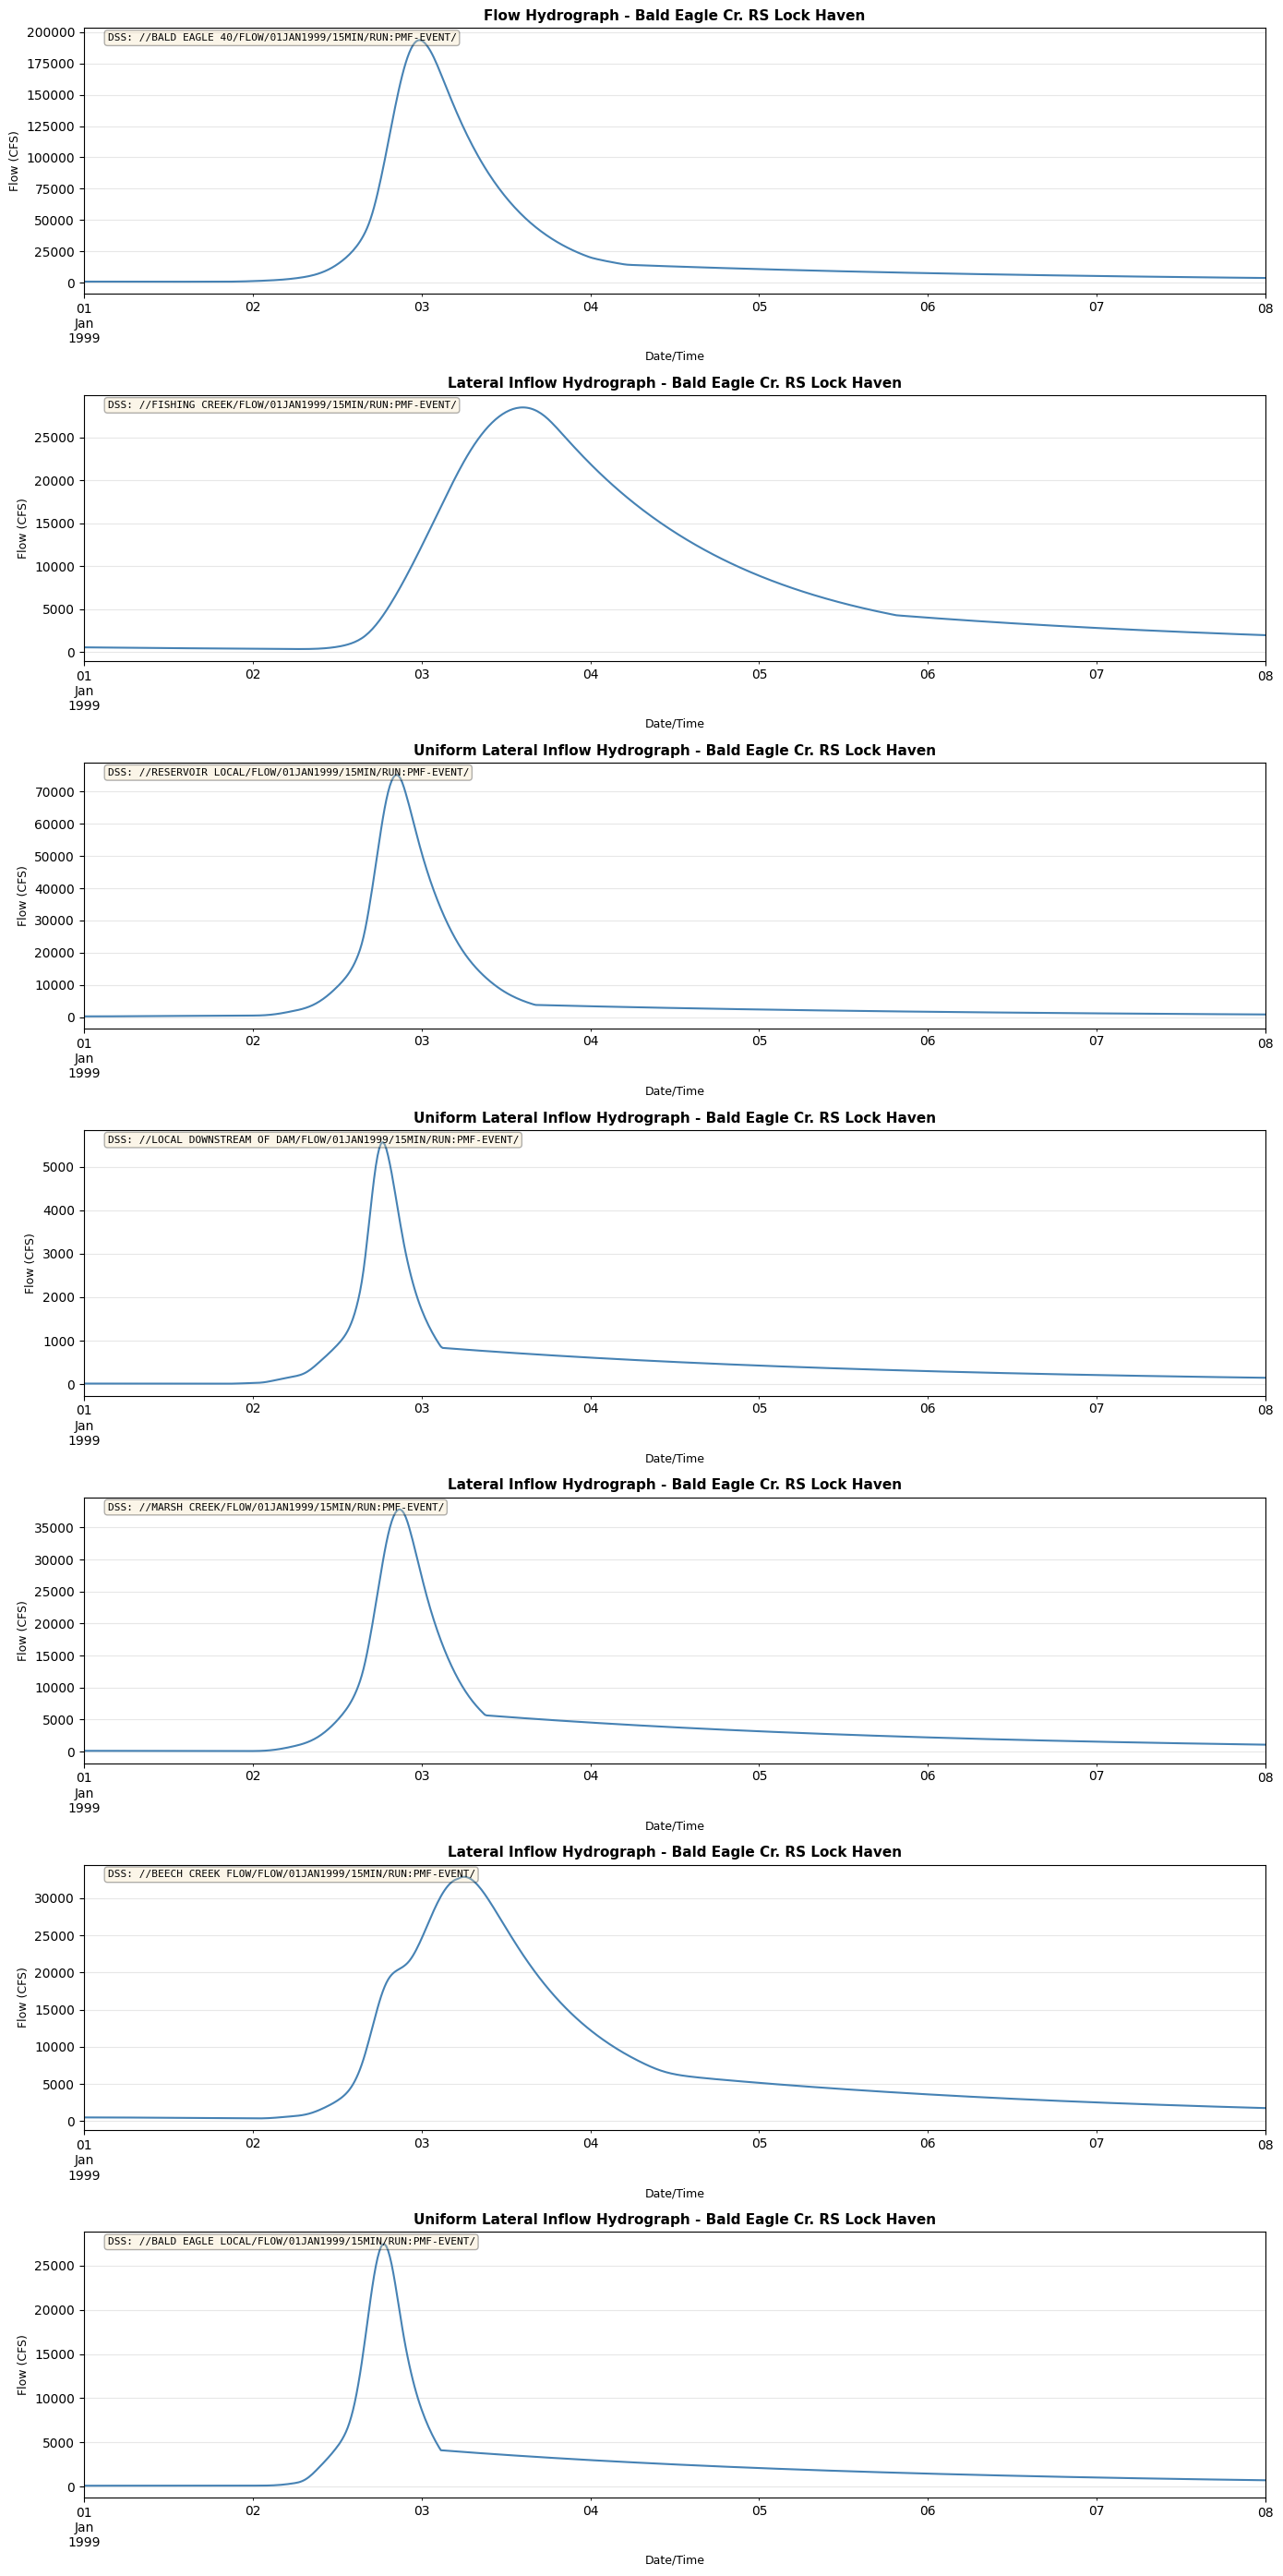

In [11]:
# Get all successfully extracted DSS boundaries
successful_dss = enhanced_boundaries[
    ((enhanced_boundaries['Use DSS'] == True) | (enhanced_boundaries['Use DSS'] == 'True')) & 
    (enhanced_boundaries['dss_timeseries'].notna())
]

if len(successful_dss) > 0:
    # Create subplots
    n_plots = len(successful_dss)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 4*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for ax, (idx, row) in zip(axes, successful_dss.iterrows()):
        df = row['dss_timeseries']
        
        # Plot
        df['value'].plot(ax=ax, linewidth=1.5, color='steelblue')
        
        # Format
        title = f"{row['bc_type']} - {row['river_reach_name']} RS {row['river_station']}"
        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.set_xlabel('Date/Time', fontsize=9)
        ax.set_ylabel(f"Flow ({df.attrs.get('units', '')})", fontsize=9)
        ax.grid(True, alpha=0.3)
        
        # Add DSS path as text
        ax.text(0.02, 0.98, f"DSS: {row['DSS Path']}", 
                transform=ax.transAxes, fontsize=8, 
                verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.show()
else:
    print("No successful DSS extractions to plot")

## Step 9: Plot Multiple DSS Boundaries

Create a multi-panel plot showing all DSS boundary conditions.

In [12]:
# Export to CSV (without the DataFrame column)
export_df = enhanced_boundaries.drop(columns=['dss_timeseries']).copy()

# Add summary statistics for DSS boundaries
for idx, row in enhanced_boundaries.iterrows():
    is_dss = (row['Use DSS'] == True) or (row['Use DSS'] == 'True')
    if is_dss and row['dss_timeseries'] is not None:
        df = row['dss_timeseries']
        export_df.at[idx, 'dss_points'] = len(df)
        export_df.at[idx, 'dss_mean'] = df['value'].mean()
        export_df.at[idx, 'dss_max'] = df['value'].max()
        export_df.at[idx, 'dss_min'] = df['value'].min()

# Save
output_file = project_path / "boundaries_with_dss_summary.csv"
export_df.to_csv(output_file, index=False)
print(f"Exported to: {output_file}")

# Show summary
dss_summary_cols = ['bc_type', 'Use DSS', 'dss_points', 'dss_mean', 'dss_max', 'dss_min']
available_cols = [c for c in dss_summary_cols if c in export_df.columns]
print(f"\nDSS Boundary Statistics:")

# Filter for DSS boundaries
dss_summary = export_df[
    (export_df['Use DSS'] == True) | (export_df['Use DSS'] == 'True')
][available_cols]
display(dss_summary)

Exported to: c:\GH\ras-commander\examples\example_projects_22_dss_boundary_extraction\BaldEagleCrkMulti2D\boundaries_with_dss_summary.csv

DSS Boundary Statistics:


,bc_type,Use DSS,dss_points,dss_mean,dss_max,dss_min
0,Flow Hydrograph,True,673.0,23749.776843,193738.197396,719.775321
2,Lateral Inflow Hydrograph,True,673.0,7554.055251,28510.083069,345.889757
4,Uniform Lateral Inflow Hydrograph,True,673.0,6448.671063,75262.300507,209.150354
5,Uniform Lateral Inflow Hydrograph,True,673.0,539.962137,5568.152787,9.979876
6,Lateral Inflow Hydrograph,True,673.0,4343.093777,37820.325998,94.606990
7,Lateral Inflow Hydrograph,True,673.0,6971.806773,32872.193876,382.693009
8,Uniform Lateral Inflow Hydrograph,True,673.0,2710.452795,27428.172923,100.189004


## Step 10: Export Boundary Data

Save extracted boundary condition data for further analysis.

In [13]:
# Export to CSV (without the DataFrame column)
export_df = enhanced_boundaries.drop(columns=['dss_timeseries']).copy()

# Add summary statistics for DSS boundaries
for idx, row in enhanced_boundaries[enhanced_boundaries['Use DSS'] == True].iterrows():
    if row['dss_timeseries'] is not None:
        df = row['dss_timeseries']
        export_df.at[idx, 'dss_points'] = len(df)
        export_df.at[idx, 'dss_mean'] = df['value'].mean()
        export_df.at[idx, 'dss_max'] = df['value'].max()
        export_df.at[idx, 'dss_min'] = df['value'].min()

# Save
output_file = project_path / "boundaries_with_dss_summary.csv"
export_df.to_csv(output_file, index=False)
print(f"Exported to: {output_file}")

# Show summary
dss_summary_cols = ['bc_type', 'Use DSS', 'dss_points', 'dss_mean', 'dss_max', 'dss_min']
available_cols = [c for c in dss_summary_cols if c in export_df.columns]
print(f"\nDSS Boundary Statistics:")
display(export_df[export_df['Use DSS'] == True][available_cols])

Exported to: c:\GH\ras-commander\examples\example_projects_22_dss_boundary_extraction\BaldEagleCrkMulti2D\boundaries_with_dss_summary.csv

DSS Boundary Statistics:


,bc_type,Use DSS


## Step 11: Access Individual DSS Time Series

Access extracted data from the enhanced boundaries_df.

In [14]:
# Access specific boundary by index
if len(successful_dss) > 0:
    # Get first successful DSS boundary
    idx = successful_dss.index[0]
    boundary_data = enhanced_boundaries.loc[idx, 'dss_timeseries']
    
    print(f"Accessing DSS data for boundary {idx}:")
    print(f"  Type: {enhanced_boundaries.loc[idx, 'bc_type']}")
    print(f"  Data points: {len(boundary_data)}")
    
    # Show statistics
    print(f"\nData statistics:")
    print(boundary_data['value'].describe())
    
    # Access metadata
    print(f"\nMetadata:")
    for key, value in boundary_data.attrs.items():
        print(f"  {key}: {value}")

Accessing DSS data for boundary 0:
  Type: Flow Hydrograph
  Data points: 673

Data statistics:
count       673.000000
mean      23749.776843
std       42452.303066
min         719.775321
25%        4332.272683
50%        7792.191249
75%       14070.993090
max      193738.197396
Name: value, dtype: float64

Metadata:
  pathname: //BALD EAGLE 40/FLOW/01JAN1999/15MIN/RUN:PMF-EVENT/
  units: CFS
  type: INST-VAL
  interval: 15
  dss_file: C:\GH\ras-commander\examples\example_projects_22_dss_boundary_extraction\BaldEagleCrkMulti2D\Bald_Eagle_Creek.dss


## Summary

This notebook demonstrated:
1. ✅ Reading DSS file catalogs
2. ✅ Extracting individual time series from DSS files
3. ✅ Automatic extraction of ALL DSS boundary data with `extract_boundary_timeseries()`
4. ✅ Plotting and analyzing DSS data
5. ✅ Exporting results

### Key Features
- **Unified API** - Same DataFrame structure for manual and DSS boundaries
- **Automatic extraction** - One function call extracts all DSS data
- **V6 and V7 support** - Works with both DSS formats
- **Auto-download** - HEC Monolith libraries downloaded automatically on first use

### Next Steps
- Use extracted data for boundary condition analysis
- Compare DSS vs manual boundary definitions
- Modify DSS data and write back to files (future enhancement)
- Integrate DSS data with HEC-RAS model workflows